### Derivadas Parciais e Gradientes

O que são derivadas parciais?

Em um modelo de aprendizado de máquina, a função que queremos otimizar é uma **função de erro ou perda** (por exemplo, a **função de perda de entropia cruzada** para classificação). Essa finção depende de vários parâmetros (como pesos de redes neurais). As **derivadas parciais** medem como a função de erro muda em relação a cada parâmetro individualmente, enquanto os outros parâmetros permanecem constantes.

🔹**Derivadas Parciais** A derivada parcial de uma função $f(x_1, x_2, \dots, x_n)$ em relação a $x_i$ é a taxa de variação de $f$ quando $x_i$ muda, enquanto as outras variáveis são mantidas constantes.\
Por exemplo, se temos uma função de perda $L(w_1, w_2)$, as derivadas parciais seriam:
$$\frac{\partial L}{\partial w_1} \quad \text{e} \quad \frac{\partial L}{\partial w_2}$$
Aqui,  $w_1$ e $w_2$ são os pesos da rede neural.

O que são Gradientes?

O gradiente é um vetor que contém todas as derivadas parciais de uma função de erro. Quando treinamos uma rede neural, o gradiente nos diz em qual direção e com qual magnitude devemos ajustar os pesos para reduzir a função de perda.

🔹O gradiente de uma função $f(w_1, w_2, \dots, w_n)$ é dado por:
$$\nabla f(w_1, w_2, \dots, w_n) = \left( \frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2}, \dots, \frac{\partial f}{\partial w_n} \right)$$

Em rede neurais, utiliza o algoritmo de backpropagation usa o gradiente para ajustar os pesos da rede, calculando as derivadas parciais da função de erro em relação aos pesos e aplicando esses ajustes em cada camada.

**Exemplo**

Se estamos treinando uma rede neural para prever a próxima palavra em uma sequência de texto (como em um modelo de linguagem), queremos minimizar a função de perda (por exempl, a perda de entropia cruzada) com relação aos pesos da rede. Isso é feito calculando o gradiente da função de erro e atualizando os pesos.

🔹Digamos que nossa função de perda seja $L = (y - \hat{y})^2$, onde $y$ é o valor real e $/hat{y}$ é previsão.\
🔹O gradiente de $L$ com relação ao peso $w$ seria:

$$\frac{\partial L}{\partial w} = 2 (y - \hat{y}) \cdot \frac{\partial \hat{y}}{\partial w}$$

Esse gradiente é enteão usado para atualizar os pesos da rede neural durante o treinamento.

![](gradient_descent.gif)


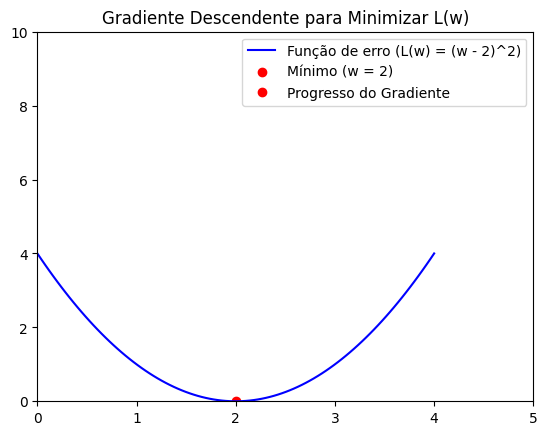

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Função de erro (função quadrática)
def L(w):
    return (w - 2)**2

# Derivada da função de erro
def grad_L(w):
    return 2 * (w - 2)

# Gradiente Descendente
def gradient_descent(starting_w, learning_rate, iterations):
    w_values = [starting_w]  # Ponto inicial
    for i in range(iterations):
        grad = grad_L(w_values[-1])
        new_w = w_values[-1] - learning_rate * grad  # Atualiza o peso
        w_values.append(new_w)
    return w_values

# Parâmetros
starting_w = 5.0  # Ponto de início
learning_rate = 0.1  # Taxa de aprendizado
iterations = 20  # Número de iterações

# Executando o Gradiente Descendente
w_values = gradient_descent(starting_w, learning_rate, iterations)

# Gerando o gráfico
fig, ax = plt.subplots()
w = np.linspace(0, 4, 100)
ax.plot(w, L(w), label="Função de erro (L(w) = (w - 2)^2)", color="blue")
ax.set_xlim(0, 5)
ax.set_ylim(0, 10)

# Ponto de mínimo
ax.scatter(2, 0, color="red", label="Mínimo (w = 2)")

# Animação
line, = ax.plot([], [], 'ro', label='Progresso do Gradiente')

def update(frame):
    line.set_data(w_values[:frame], L(np.array(w_values[:frame])))
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(w_values), interval=500, repeat=False)

# Exibindo o gráfico animado
plt.legend()
plt.title("Gradiente Descendente para Minimizar L(w)")
plt.show()

# Para salvar a animação em um arquivo gif, podemos usar:
ani.save('gradient_descent.gif', writer='imagemagick', fps=2)

### Regras da Cadeia para Derivação de Funções Compostas

O que é a regra da cadeia?

Em redes neurais profundas, a função de erro é composta por várias funções, pois cada camada da rede aplica uma transformação nos dados de entrada. A **regra da cadeia** é utilizada para calcular a derivada de funções compostas, o que é essencial para o treinamento das redes neurais, particularmente no algoritmo de **backpropagation**.

🔹**Regra da Cadeia**  
A regra da cadeia nos diz como derivar uma função composta. Se tivermos uma função $z = g(f(x))$, a derivada de $z$ em relação a $x$ é dada por:

$$ \frac{dz}{dx} = \frac{dg}{df} \cdot \frac{df}{dx} $$

Em redes neurais, essa regra é fundamental, pois a saída de uma camada depende da entrada da camada anterior.

### Exemplo Prático

Considere uma rede neural simples com uma função de ativação $\sigma(x)$ e uma função de perda $L$. Durante o treinamento, usamos a regra da cadeia para calcular a derivada da função de perda em relação aos pesos:

🔹A derivada da função de perda $L$ em relação ao peso $w$ é dada por:

$$ \frac{\partial L}{\partial w} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w} $$

Onde:

- $a = \sigma(z)$ é a ativação da camada,
- $z = w \cdot x + b$ é a saída da camada anterior.

Essa aplicação da regra da cadeia permite calcular as derivadas de forma eficiente, propagando o erro de volta pela rede durante o processo de **backpropagation**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Funções
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(a):
    return (a - 1) ** 2  # Função de erro simples

# Função composta: L = loss(sigmoid(x))
def composed_function(x):
    z = x  # Simplesmente definimos z = x para demonstrar
    a = sigmoid(z)
    L = loss(a)
    return z, a, L

# Função para atualizar o gráfico
def plot_chain_rule(x):
    z, a, L = composed_function(x)
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    axs[0].plot(x, z, 'bo')
    axs[0].set_title(f'1️⃣ Entrada -> Camada Oculta\n$z = x$')
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$z$')
    
    axs[1].plot(z, a, 'ro')
    axs[1].set_title(f'2️⃣ Camada Oculta -> Ativação\n$a = \sigma(z)$')
    axs[1].set_xlabel('$z$')
    axs[1].set_ylabel('$a$')
    
    axs[2].plot(a, L, 'go')
    axs[2].set_title(f'3️⃣ Ativação -> Perda\n$L = (a - 1)^2$')
    axs[2].set_xlabel('$a$')
    axs[2].set_ylabel('$L$')

    plt.show()

# Criando o widget interativo
interactive_plot = interactive(plot_chain_rule, x=(-3.0, 3.0, 0.1))
interactive_plot

In [2]:
import matplotlib.animation as animation
import numpy as np

x_vals = np.linspace(-3, 3, 30)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

def update(i):
    axs[0].clear()
    axs[1].clear()
    axs[2].clear()
    
    x = x_vals[i]
    z, a, L = composed_function(x)

    axs[0].plot(x, z, 'bo')
    axs[0].set_title(f'1️⃣ Entrada -> Camada Oculta\n$z = x$')
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$z$')

    axs[1].plot(z, a, 'ro')
    axs[1].set_title(f'2️⃣ Camada Oculta -> Ativação\n$a = \sigma(z)$')
    axs[1].set_xlabel('$z$')
    axs[1].set_ylabel('$a$')

    axs[2].plot(a, L, 'go')
    axs[2].set_title(f'3️⃣ Ativação -> Perda\n$L = (a - 1)^2$')
    axs[2].set_xlabel('$a$')
    axs[2].set_ylabel('$L$')

ani = animation.FuncAnimation(fig, update, frames=len(x_vals), interval=200)
ani.save('chain_rule_animation.gif', writer='pillow', fps=5)

NameError: name 'plt' is not defined